In [1]:
# Import stuff: 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

from sympy import Symbol
from sympy.solvers import solve

# This is for reasonable fontsize universally defined:
fs_label = 16
parameters = {                
                'figure.titlesize': fs_label+6,
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label
             }
plt.rcParams.update(parameters)


# It would be nice if we could set the width of the lines at once: 
plt.rcParams['lines.linewidth'] = 6

# We could also try with the colours:
#plt.rcParams['lines.color'] = 'r' # maybe here with more colours if needed?

In [26]:
# Setting the parameters:

# P: lizards, the predators
# N: insects, the prey

yr = 365
t = np.linspace(0, 50, 1000) # time in years

# Lizard parameters:
life_years = 4.5 # total lifespan (average)
repr_years = life_years - 2 # lizards mature sexually at 2 years old
clutch_size = 2 # females lay two eggs per clutch
clutch_freq = 2 # females lay two clutches per year

offspring = (clutch_size * clutch_freq) /2 # so, 2 offspring per lizard

feeding_freq = 3 # days until next feeding on beetles
feeding_quant = 1 # beetles at every feeding
feeding_per_year = yr * feeding_quant / feeding_freq # how many beetles a lizard eats (e.g. it eats 122 beetles per year)

eps = offspring / feeding_per_year # efficiency: how many beetles are needed to produce one offspring (e.g. 61 beetles are needed per year)
d = 1 / life_years # death rate : one lizard lives for 4.5 years

# Beetle parameters: 
# They are not very realistic...but I am trying to lower r so that N does not overshoot
N_eggs = 50 # 50 eggs per beetle in their lifetime
N_eggs_survival = 0.1 # 90% of the eggs will get eaten not reach reproductive age
N_d = 1/1 # beetles live for 1 year
r = N_eggs*N_eggs_survival - N_d # growth rate of insects N
#r = 2
# # eps, b, d, r = 1/61, 0.182, 1/4.5, 2


# Island parameters: 
V = 20 # square meters, total area of island

# Clearance rate:
b = 1/(3*1) # let's say that this represents 1 sqm per 3 days per 1 lizard


# Put the needed parameters in a tuple to use in the ODE:
params = (eps, b, d, r)

# Initial populations:
N0 = 500
P0 = 100
state_init = (P0/V, N0/V) # we input the densities of each population
#state_init = (P0, N0) # we input the densities of each population

In [21]:
def deriv(state, t, *params):
    eps, b, d, r = params
    P, N = state
    dP_dt = eps*b*N*P - d*P
    dN_dt = r*N - b*N*P
    return np.array([dP_dt, dN_dt])

In [22]:
# Solve for the equilibrium abundances of prey and predator
N = Symbol('N')
P = Symbol('P')
solve([eps*b*N*P - d*P, r*N - b*N*P])

[{N: 0.0, P: 0.0}, {N: 40.5555555555556, P: 12.0000000000000}]

In [23]:
omega = np.sqrt(d*r)
print(2*np.pi/omega)
P_eq, N_eq = r/b, d/(eps*b)
eq = (P_eq, N_eq)
print(eq)

6.664324407237549
(12.0, 40.55555555555556)


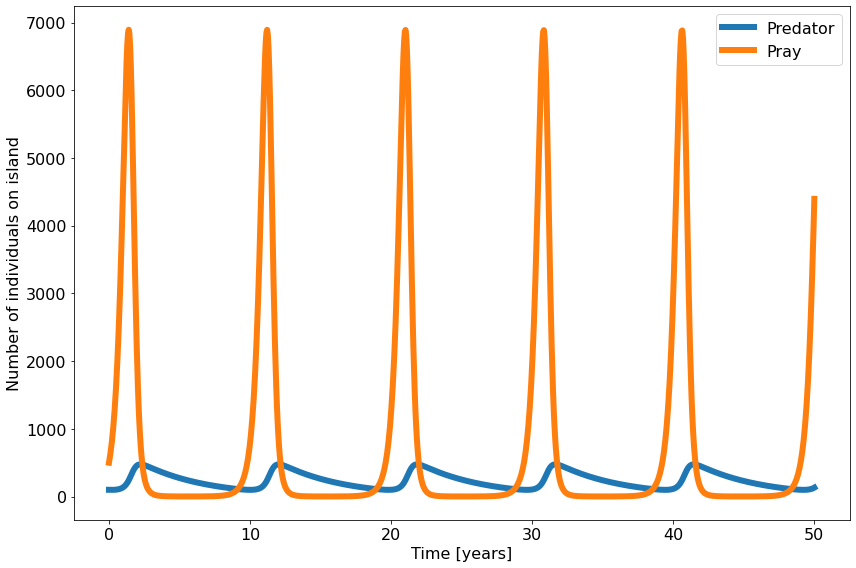

In [27]:
# Solve the system numerically and plot the results as the number of predators and prey as a function of time

num_sol = odeint(deriv, state_init, t, args=params).T
P, N = num_sol

fig, ax = plt.subplots(1,1, figsize=(12, 8), tight_layout=True)
# ax.plot(t, P, label="Predator")
# ax.plot(t, N, label="Pray")
ax.plot(t, P*V, label="Predator")
ax.plot(t, N*V, label="Pray")

ax.set_xlabel("Time [years]")
ax.set_ylabel("Number of individuals on island")
ax.legend()

Text(0.5, 0, 'Number of lizards (P - predators)')

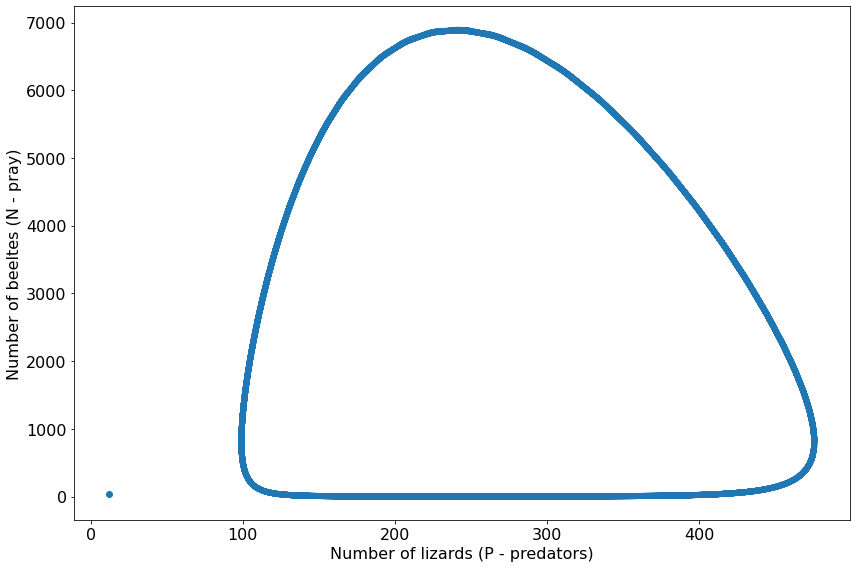

In [29]:
# Solve the system numerically and plot the results the phase portrait (predators vs. prey)

fig, ax = plt.subplots(1,1, figsize=(12, 8), tight_layout=True)
ax.plot(P*V, N*V)
ax.scatter(12, 40.5)
ax.set_ylabel("Number of beeltes (N - pray)")
ax.set_xlabel("Number of lizards (P - predators)")


# Does the system reach the equilibrium determined above?
# no but I was not expecting this plot lol

No handles with labels found to put in legend.


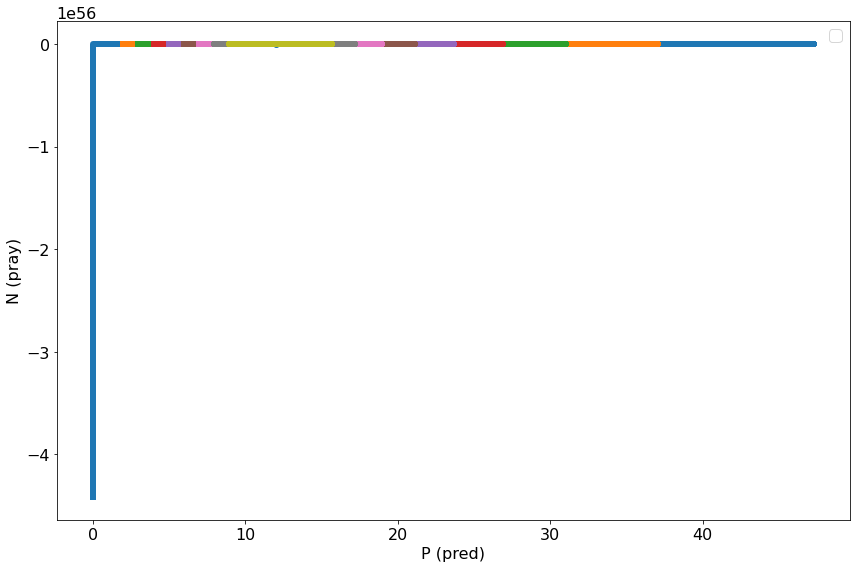

In [17]:
fig, ax = plt.subplots(1,1, figsize=(12, 8), tight_layout=True)
for p in range(20, 200, 20):
    state_init = (p/V, 1e3/V)
    params = (eps, b, d, r)
    num_sol = odeint(deriv, state_init, t, args=params).T
    P, N = num_sol
    ax.plot(P, N)
ax.scatter(*eq)
ax.set_ylabel("N (pray)")
ax.set_xlabel("P (pred)")
ax.legend()

In [ ]:
step = lambda x: int(x>0)

def deriv(state, t, *params):
    eps, b, d, r = params
    u, k = 1, 100
    P, N = state
    dP_dt = eps*b*N*P - d*P - u*step(P-N)*P
    dN_dt = r*N - b*N*P
    return np.array([dP_dt, dN_dt])

state_init = (100/V, 1e3/V)
params = (eps, b, d, r)
num_sol = odeint(deriv, state_init, t, args=params).T
P, N = num_sol

fig, ax = plt.subplots(1,1, figsize=(12, 8), tight_layout=True)
ax.plot(t, P*V, label="Predator")
ax.plot(t, N*V, label="Pray")
ax.set_xlabel("t [year]")
ax.legend()

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 8), tight_layout=True)
for p in range(20, 200, 20):
    state_init = (p/V, 1e3/V)
    params = (eps, b, d, r)
    num_sol = odeint(deriv, state_init, t, args=params).T
    P, N = num_sol
    ax.plot(P, N)
ax.scatter(*eq)
ax.set_ylabel("N (pray)")
ax.set_xlabel("P (pred)")
# ax.legend()